# Data Cleaning Using Python Libraries

#### This is a step-by-step process of cleaning data from a dataset found here: https://www.kaggle.com/datasnaek/youtube-new

#### This is an adaptation from this reference: https://medium.com/@raahimkhan_85173/data-cleaning-and-exploratory-data-analysis-with-pandas-on-trending-you-tube-video-statistics-e06d7cd08710

##### Install the libraries below

In [1]:
#!pip install numpy pandas matplotlib seaborn

##### Import Libraries + Verify Versions + Initial Settings

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
	
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)


numpy version: 2.0.0
pandas version: 2.2.2
matplotlib version: 3.9.0
seaborn version: 0.13.2


In [3]:
import re
%matplotlib inline
from matplotlib import cm
from datetime import datetime
import glob
import os
import json
import pickle
import six

##### Define the location of the files

In [4]:
# Define the path to the directory
CSV_path = '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01'

# Print the path
print(CSV_path)


/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01


##### Return CSV files only and save them in a list variable

In [5]:
# Find all CSV files in the specified directory
AllCSV = [i for i in glob.glob(f'{CSV_path}/*.csv')]

# Print the list of CSV files
print(AllCSV)

['/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/MXvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/INvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/DEvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/JPvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/KRvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/CAvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/RUvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/FRvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/USvideos.csv', '/Users/kristinefrancesbaldas/Documents/Google Analytics Course/Hands-on 01/Sample01/GBvideos.csv']

In [6]:

files = {} # initialise an empty dictionary.
all_dataframes = [] #initiate an empty list to store each data frame separately

for csv in AllCSV:
    try:
        # Try reading the CSV file with utf-8 encoding
         df = pd.read_csv(csv, encoding = 'utf-8')
    except UnicodeDecodeError:
        # If utf-8 encoding fails, try reading the CSV file with latin1 encoding
        df = pd.read_csv(csv, encoding='latin1')
    
    # Extract the country code from the file name
    file_name = csv.split('/')[-1]
    country_code = file_name[:2]
    print(file_name)
    # Add the country code to the dictionary:
    files[file_name] = country_code
    
    # Add a 'country' column to the DataFrame
    df['country'] = country_code
    
    # Append the DataFrame to the list
    all_dataframes.append(df)

# Display the first few rows of the first DataFrame in the list
print(files)

print(all_dataframes[0].head(n=10))  # Use print() to ensure it displays in some environments



MXvideos.csv
INvideos.csv
DEvideos.csv
JPvideos.csv
KRvideos.csv
CAvideos.csv
RUvideos.csv
FRvideos.csv
USvideos.csv
GBvideos.csv
{'MXvideos.csv': 'MX', 'INvideos.csv': 'IN', 'DEvideos.csv': 'DE', 'JPvideos.csv': 'JP', 'KRvideos.csv': 'KR', 'CAvideos.csv': 'CA', 'RUvideos.csv': 'RU', 'FRvideos.csv': 'FR', 'USvideos.csv': 'US', 'GBvideos.csv': 'GB'}
      video_id trending_date  \
0  SbOwzAl9ZfQ      17.14.11   
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   
5  Q9kK6NWZR1U      17.14.11   
6  c9VTD3n_IDs      17.14.11   
7  XzULSsZYMRc      17.14.11   
8  uijjYNtl_UM      17.14.11   
9  cOJ68MQm2ac      17.14.11   

                                               title  \
0                     CapÃ­tulo 12 | MasterChef 2017   
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG 

##### Familiarise yourself with your data

In [7]:
#counts the files
print(len(all_dataframes))

#display the data type for all columns
all_dataframes[0].dtypes

10


video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

### PHASE I :  Correcting Data Types

In [8]:
# Change the following objects to string data types.

# Identify the columns that are objects:

for df in all_dataframes:
    object_columns = df.select_dtypes(include=['object']).columns
    df[object_columns] = df[object_columns].astype('string')

# Verify if the objects have been converted to strings

print(all_dataframes[0].dtypes)

video_id                  string[python]
trending_date             string[python]
title                     string[python]
channel_title             string[python]
category_id                        int64
publish_time              string[python]
tags                      string[python]
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link            string[python]
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description               string[python]
country                   string[python]
dtype: object


In [9]:
# Do the same for the boolean data types

for df in all_dataframes:
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype('category')
    
# Verify if the objects have been converted to strings
print(all_dataframes[1].dtypes)

video_id                  string[python]
trending_date             string[python]
title                     string[python]
channel_title             string[python]
category_id                        int64
publish_time              string[python]
tags                      string[python]
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link            string[python]
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description               string[python]
country                   string[python]
dtype: object


In [10]:
#Create a custom function that will convert "trending_date" column from YY.DD.MM to YYYY-DD-MMM

def convert_date(date_str):
    # Split the date string into components using "." as a delimiter.
    year, day, month = date_str.split('.')
    
    # Create a mapping / dictionary from numeric month to abbreviated month name
    month_map = {
        '01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr',
        '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug',
        '09': 'Sep', '10': 'Oct', '11': 'Nov', '12': 'Dec'
    }
    
    # Convert year, day, and month to the desired format
    new_date = f'20{year}-{day}-{month_map[month]}'
    return new_date

In [11]:
print(all_dataframes[0]['trending_date'].head())


0    17.14.11
1    17.14.11
2    17.14.11
3    17.14.11
4    17.14.11
Name: trending_date, dtype: string


In [12]:
# transform the trending date from 'YY.DD.MM' to 'YYYY.DD.MMM'
for df in all_dataframes:
    df['trending_date'] = df['trending_date'].apply(convert_date)

In [13]:
#verify

print(all_dataframes[0]['trending_date'].head())


0    2017-14-Nov
1    2017-14-Nov
2    2017-14-Nov
3    2017-14-Nov
4    2017-14-Nov
Name: trending_date, dtype: object


In [14]:
print(all_dataframes[0]['publish_time'].head())

0    2017-11-13T06:06:22.000Z
1    2017-11-13T05:11:58.000Z
2    2017-11-13T17:00:02.000Z
3    2017-11-13T03:47:10.000Z
4    2017-11-13T19:17:48.000Z
Name: publish_time, dtype: string


In [15]:
# Create a function to parse 'publish_time' to 'publish_date' and 'publish_time'

def parse_publish_time(publish_time_str):
    date_time = publish_time_str.split('T')
    publish_date_new = date_time[0]
    publish_time_new = date_time[1].split('.')[0]
    return publish_date_new, publish_time_new
    

In [16]:
# Use the function on the 'publish_time' series:

for df in all_dataframes:
    df[['publish_date_new', 'publish_time_new']] = df['publish_time'].apply(lambda x: pd.Series(parse_publish_time(x)))
  
    # Convert trending_date and publish_date_new to datetime
    df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')
    df['publish_date_new'] = pd.to_datetime(df['publish_date_new'], errors='coerce')
    
    # Convert publish_time_new to time
    df['publish_time_new'] = pd.to_datetime(df['publish_time_new'], format='%H:%M:%S', errors='coerce').dt.time

In [17]:
# Verify the datatypes
print(all_dataframes[0].dtypes)

# The publish_time_new column remains an object because 
# pandas doesn't have a dedicated datetime.time type. 
# Instead, the .dt.time accessor returns a Series of Python datetime.time objects, 
# which pandas treats as generic objects.


video_id                  string[python]
trending_date             datetime64[ns]
title                     string[python]
channel_title             string[python]
category_id                        int64
publish_time              string[python]
tags                      string[python]
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link            string[python]
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description               string[python]
country                   string[python]
publish_date_new          datetime64[ns]
publish_time_new                  object
dtype: object


In [18]:
# set 'video_id' as index
for df in all_dataframes:
    df.set_index('video_id', inplace=True)

### PHASE II: Addressing Missing Values

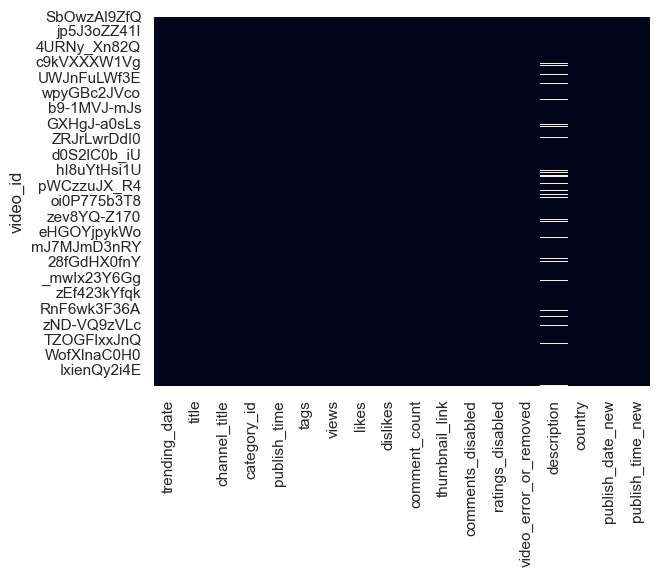

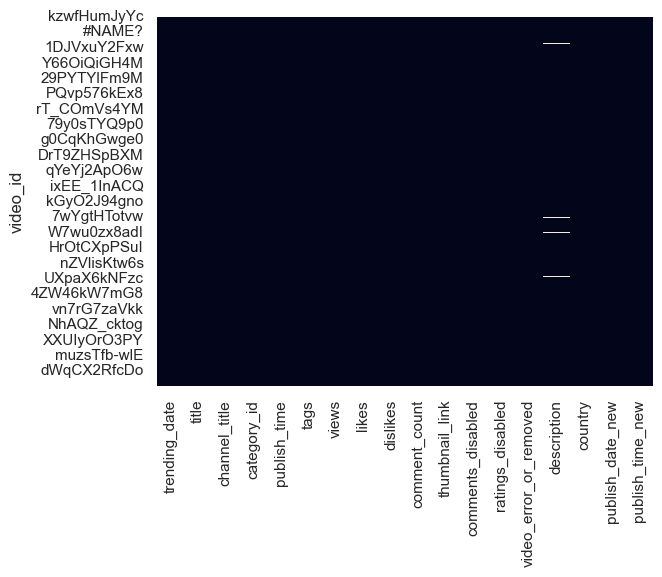

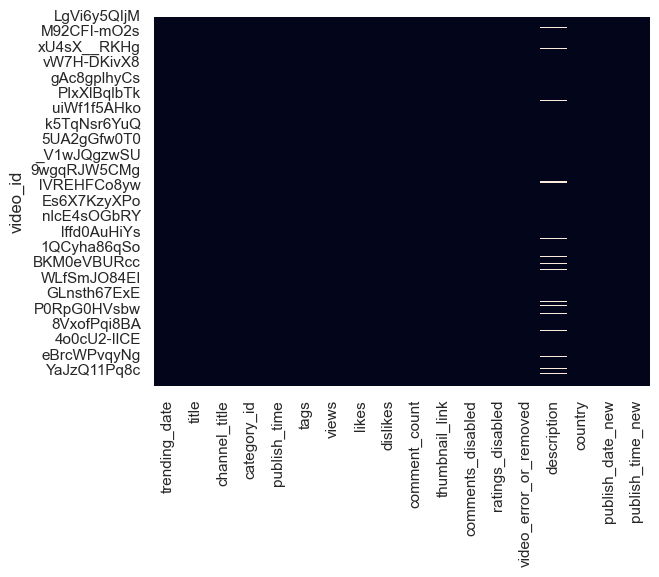

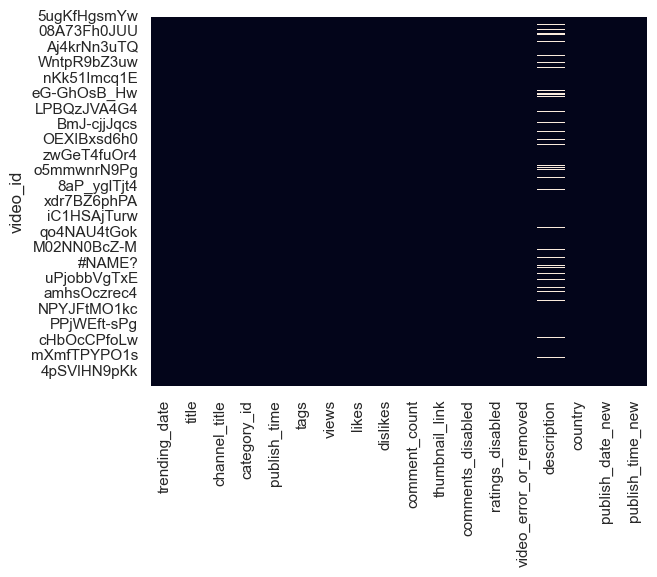

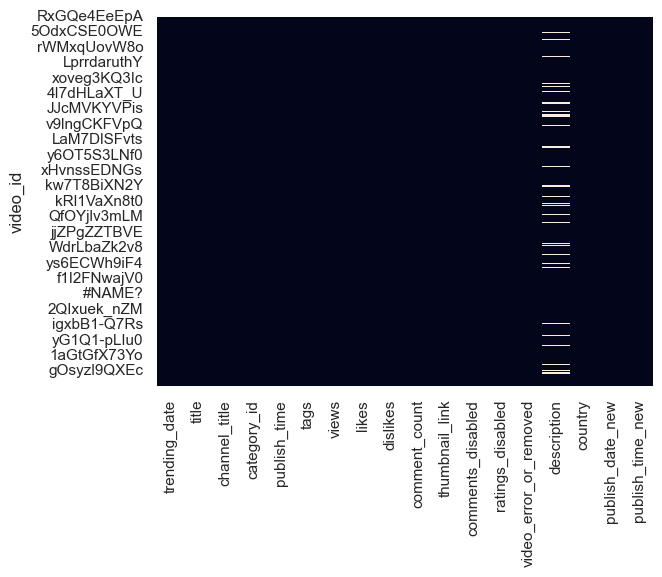

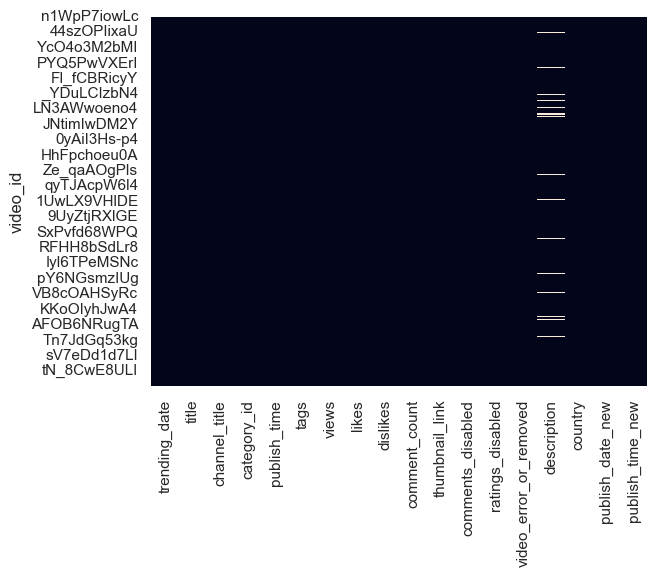

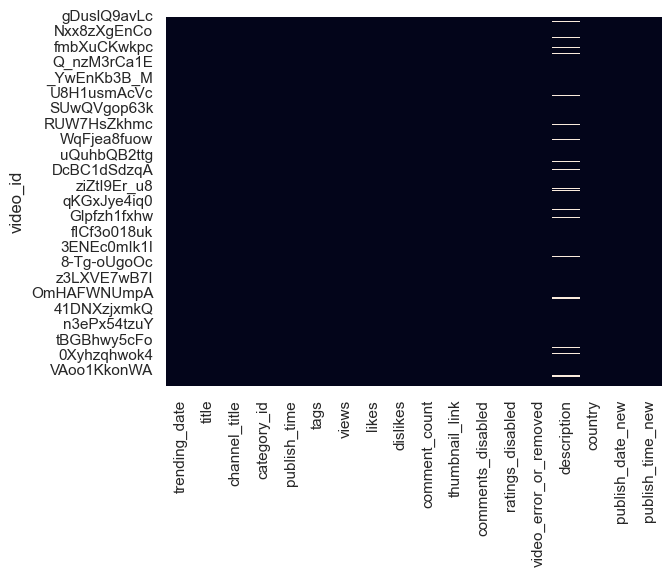

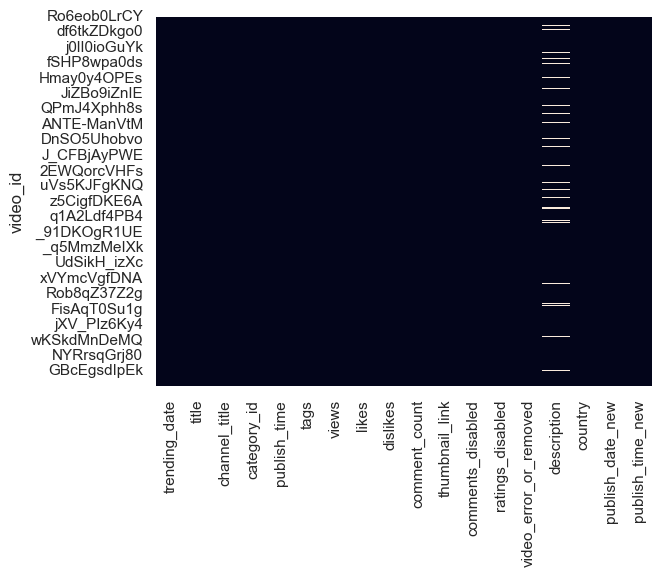

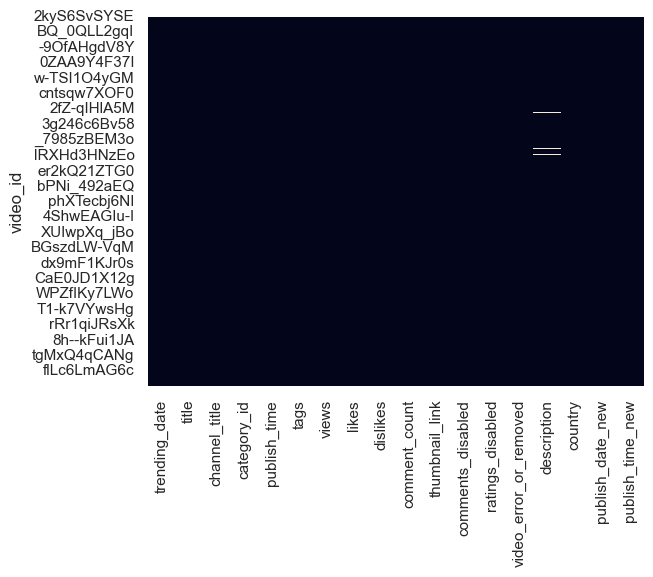

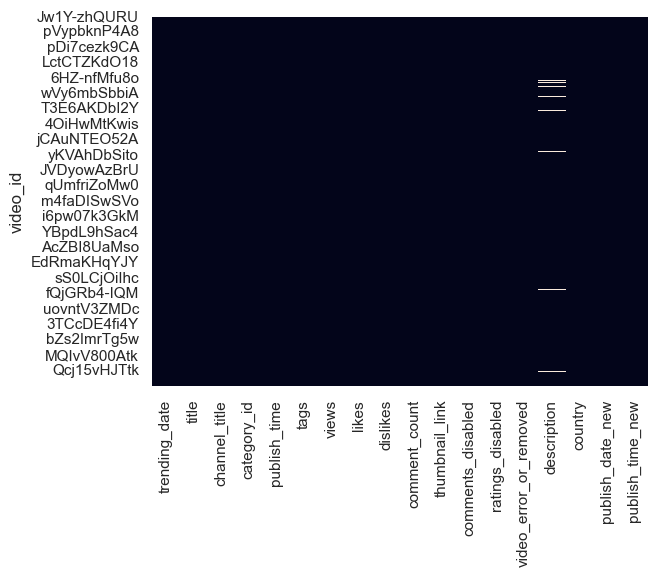

<Figure size 640x480 with 0 Axes>

In [19]:
# Check for any missing values
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [20]:
# No quantitative data is missing 
# To treat missing qualitative data, we replace blanks under 'description' with "n/a"
for df in all_dataframes:
    df['description'] = df['description'].fillna("n/a")

print(all_dataframes[0]['description'].head(n=100))

video_id
SbOwzAl9ZfQ    Disfruta la presencia del Chef Torreblanca en ...
klOV6Xh-DnI    ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...
6L2ZF7Qzsbk    La canciÃ³n del principio se llama âEste esp...
hcY52MFWMDM    El video es de un Walmart en el pais centroame...
_OXDcGPVAa4    MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...
Q9kK6NWZR1U    Un fuerte sismo ha afectado en la noche de est...
c9VTD3n_IDs    Hoy en La Resolana vamos a divertirnos con nue...
XzULSsZYMRc    (CR NOTICIAS NOV 12, 2017) UN FUERTE TERREMOTO...
uijjYNtl_UM    7 NiÃ±os Famosos Que No Supieron Adaptarse a L...
cOJ68MQm2ac    Actualizo 3 veces por semana. Si el video te g...
rZZEeeAVgog    Si, el Ã¡ngulo de la cÃ¡mara estÃ¡ raro.\nNo, ...
kTT472QeJGg    El pasado 24 de septiembre @juanpazurita junto...
yhdI98_O-Xc    Fui hasta Leon, Guanajuato para conocer y comp...
7jmJtdqI6YE    Un sismo de magnitud 6.5 sacudiÃ³ el domingo p...
Dhhp8M5K3UI    Un sismo de magnitud 6.5 sacudiÃ³ el domingo p...
M16Usa8oqDg    u

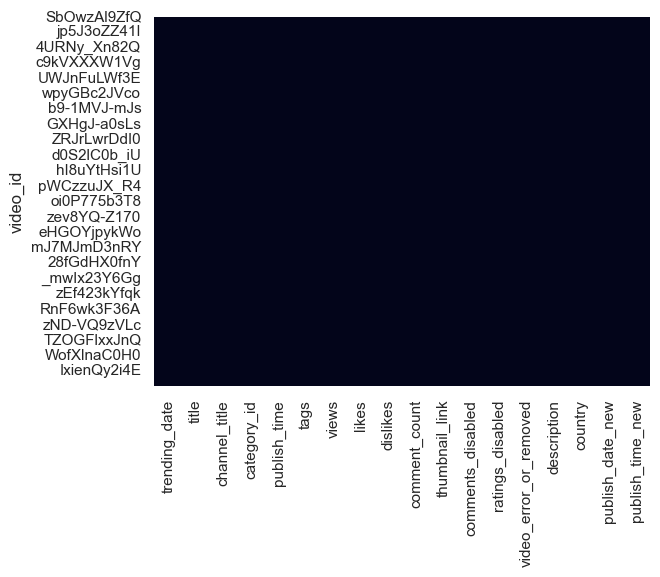

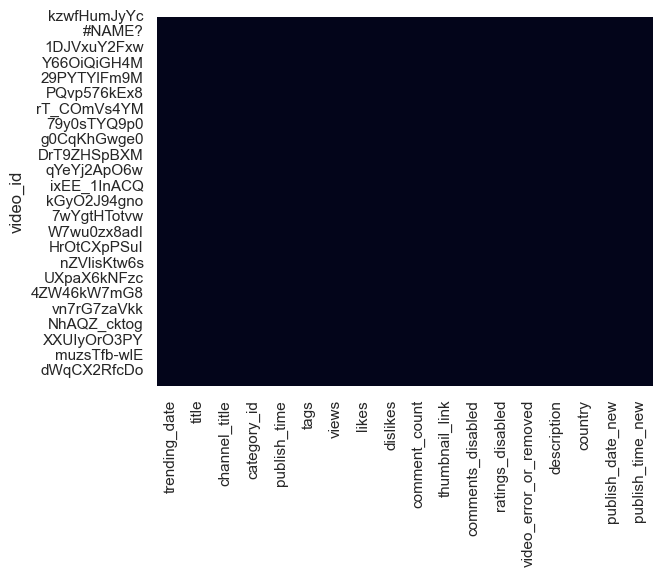

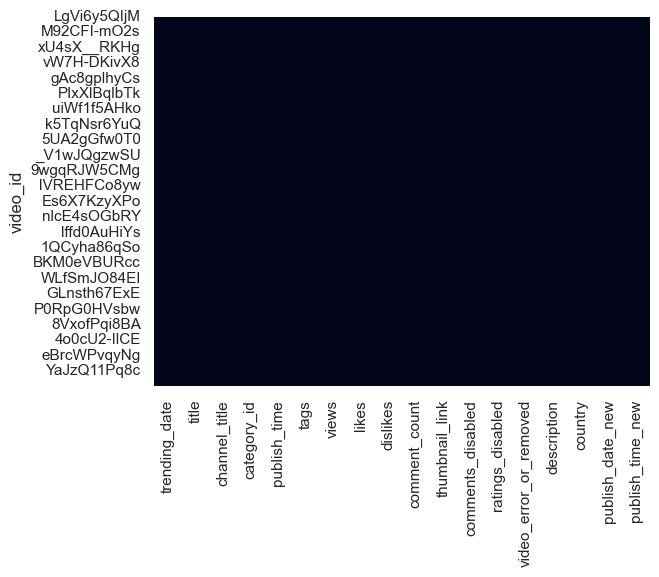

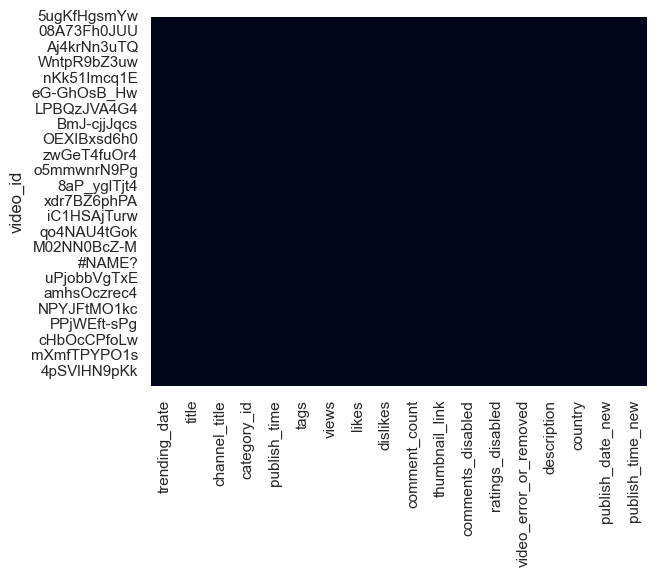

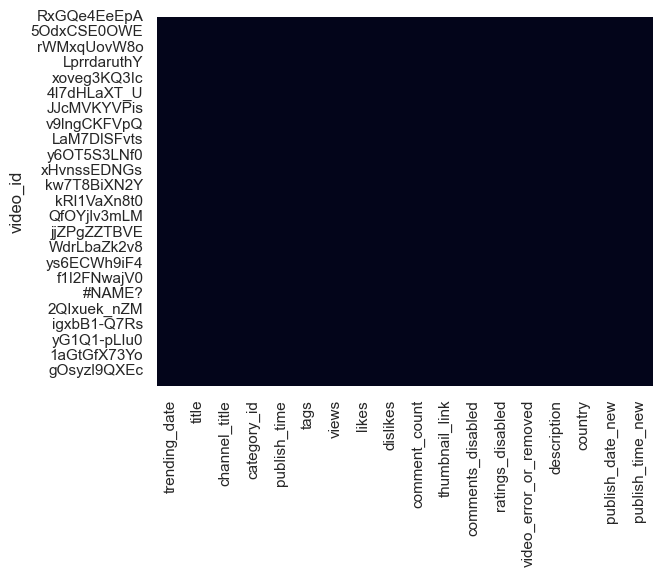

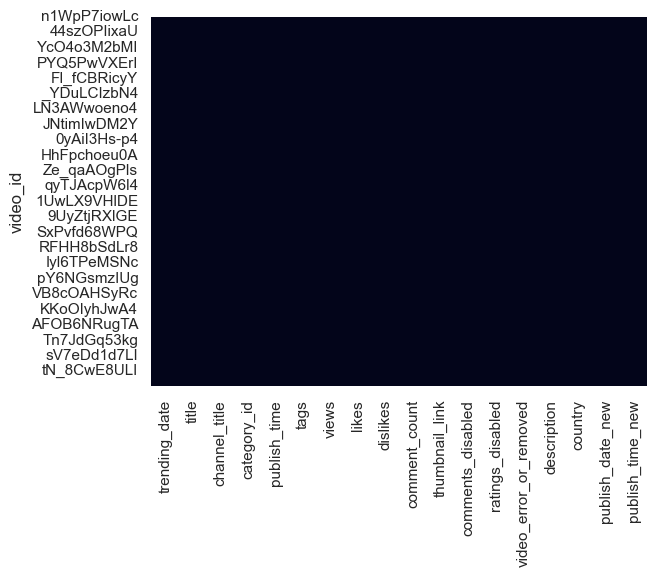

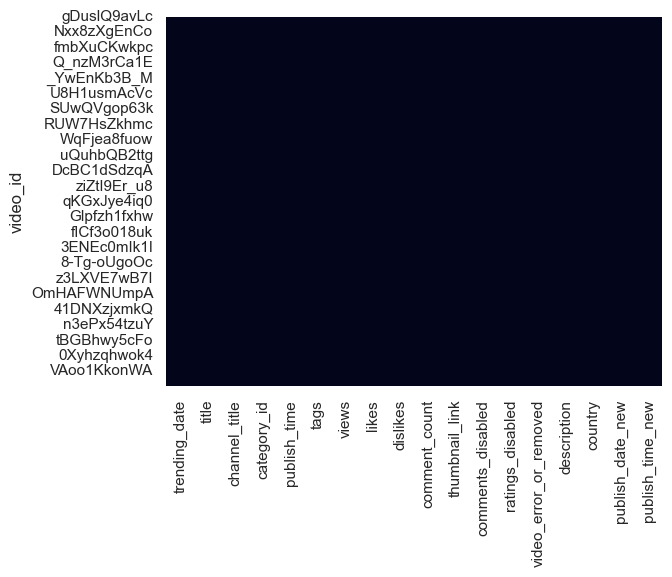

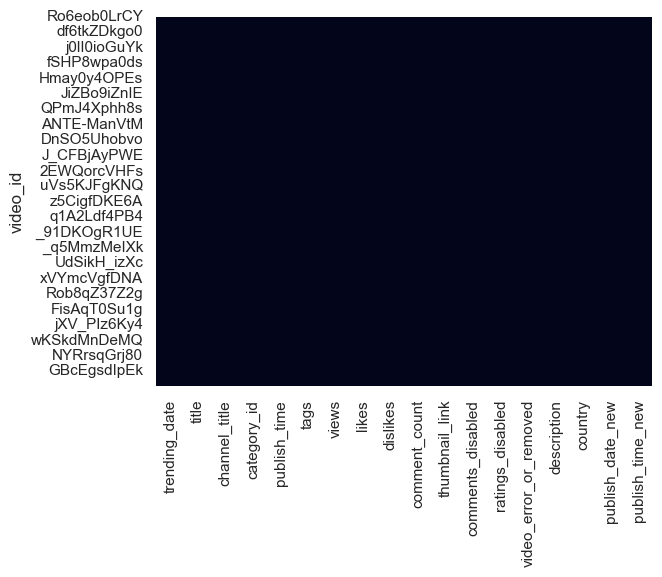

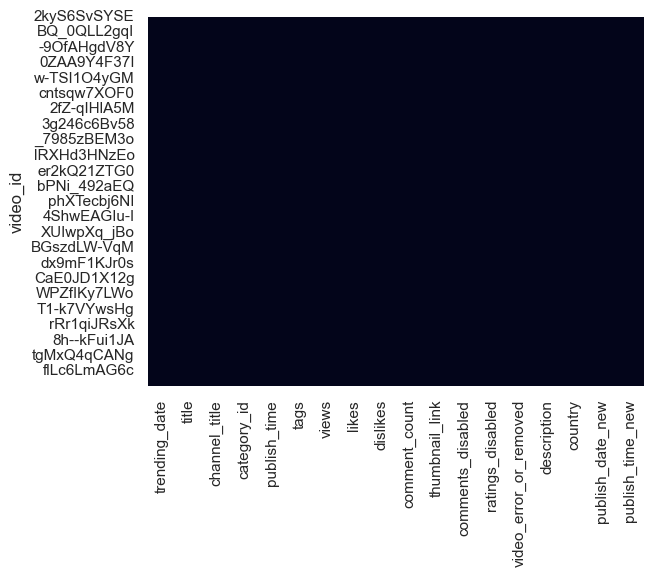

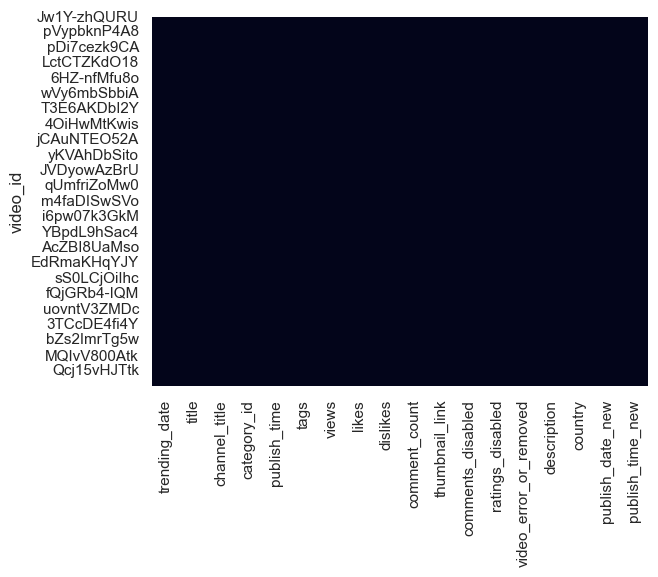

<Figure size 640x480 with 0 Axes>

In [21]:
# Validate
for df in all_dataframes:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [45]:
#Check if 'video_id' which is the index, has missing values:
for df in all_dataframes:
    missing_count = df.isnull().sum()
    print(missing_count.value_counts())

0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64
0    18
Name: count, dtype: int64


#### Summarize the missing values in each column of a dataframe


In [23]:
# initialise an empty dict

df_to_countryCode = {} #this will contain a mapping of df:country

for i, df in enumerate(all_dataframes):
    missing_data = df.isnull().sum()
    missing_columns = missing_data[missing_data > 0]
    cCode = df.iloc[0]['country']
    if missing_columns.empty == False:  # checks if the columns that have been filtered is empty (i.e. no elements)
        print(f"{i} has missing values")
        print(missing_data)
    else:
        print(f"{i} dataframe is complete")
    df_to_countryCode[i] = cCode


print(df_to_countryCode) 

0 dataframe is complete
1 dataframe is complete
2 dataframe is complete
3 dataframe is complete
4 dataframe is complete
5 dataframe is complete
6 dataframe is complete
7 dataframe is complete
8 dataframe is complete
9 dataframe is complete
{0: 'MX', 1: 'IN', 2: 'DE', 3: 'JP', 4: 'KR', 5: 'CA', 6: 'RU', 7: 'FR', 8: 'US', 9: 'GB'}


## PHASE III: Combine the datasets into a single dataset

In [ ]:
#combine all datasets
# ignore_index = True resets the index and makes it continuous for the whole dataset
# axis=0 means stacking vertically, headers are taken from the first df. assumes all dfs have the same headers. 
combined_df = pd.concat(all_dataframes, axis=0)
combined_df.reset_index
